# Решение задач методом Монте-Карло

## Задачи из задачника (Коршунов, Фосс)
1. **Задача 2.7** (глава 2): Бросаются 4 игральные кости. Найти вероятность того, что на них выпадет по одинаковому числу очков.
2. **Задача 2.8** (глава 2): В ящике 10 красных и 6 синих пуговиц. Какова вероятность того, что две наудачу вынутые пуговицы будут одноцветными?
3. **Задача 3.8** (глава 3): Стержень длины l разломан в двух наудачу выбранных точках. С какой вероятностью из полученных отрезков можно составить треугольник?

Найдем приближенные решения методом Монте-Карло и сравним с точными ответами.


In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy.special

# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline


## Задача 2.7: Кости

**Условие:** Бросаются 4 игральные кости. Найти вероятность того, что на них выпадет по одинаковому числу очков.


In [12]:
# Задача 2.7: Метод Монте-Карло

# Задаем зерно датчика
random.seed(a=42, version=2)

# Число экспериментов
n_exp = 100000

# Пространство элементарных событий (значения на кости)
A = list(range(1, 7))

# Обнуляем счетчик числа благоприятных событий
k_success = 0

# n_exp испытаний, бросаем 4 кости
for i in range(n_exp):
    # 4 броска кубика (выборка с возвращением)
    dice = random.choices(A, k=4)
    
    # Исход благоприятный? (все 4 кости показывают одинаковое число)
    if dice[0] == dice[1] == dice[2] == dice[3]:
        k_success += 1

prob_mc = k_success / n_exp
print(f'Приближенная вероятность (Монте-Карло): {np.round(prob_mc, 6)}')
print(f'После {n_exp} экспериментов')


Приближенная вероятность (Монте-Карло): 0.00456
После 100000 экспериментов


# Задача 2.7: Точное решение

Число исходов при бросании 4 костей: 6^4 = 1296
Число благоприятных исходов: все 4 кости показывают одинаковое число
Это может быть: (1,1,1,1), (2,2,2,2), (3,3,3,3), (4,4,4,4), (5,5,5,5), (6,6,6,6)
Всего 6 благоприятных исходов

In [ ]:
total_outcomes = 6 ** 4
favorable_outcomes = 6  # 6 способов: все единицы, все двойки, ..., все шестерки

prob_exact = favorable_outcomes / total_outcomes

print(f'Точная вероятность: {prob_exact:.8f}')
print(f'Число благоприятных исходов: {favorable_outcomes}')
print(f'Общее число исходов: {total_outcomes} = 6^4')
print(f'\nФормула: 6 / 6^4 = 1 / 6^3 = 1 / 216')м


Точная вероятность: 0.00462963
Число благоприятных исходов: 6
Общее число исходов: 1296 = 6^4

Формула: 6 / 6^4 = 1 / 6^3 = 1 / 216


In [14]:
# Задача 2.7: Сравнение результатов

error = abs(prob_mc - prob_exact)
relative_error = (error / prob_exact) * 100

print(f'Приближенное значение: {prob_mc:.8f}')
print(f'Точное значение: {prob_exact:.8f}')
print(f'Абсолютная ошибка: {error:.8f}')
print(f'Относительная ошибка: {relative_error:.4f}%')


Приближенное значение: 0.00456000
Точное значение: 0.00462963
Абсолютная ошибка: 0.00006963
Относительная ошибка: 1.5040%


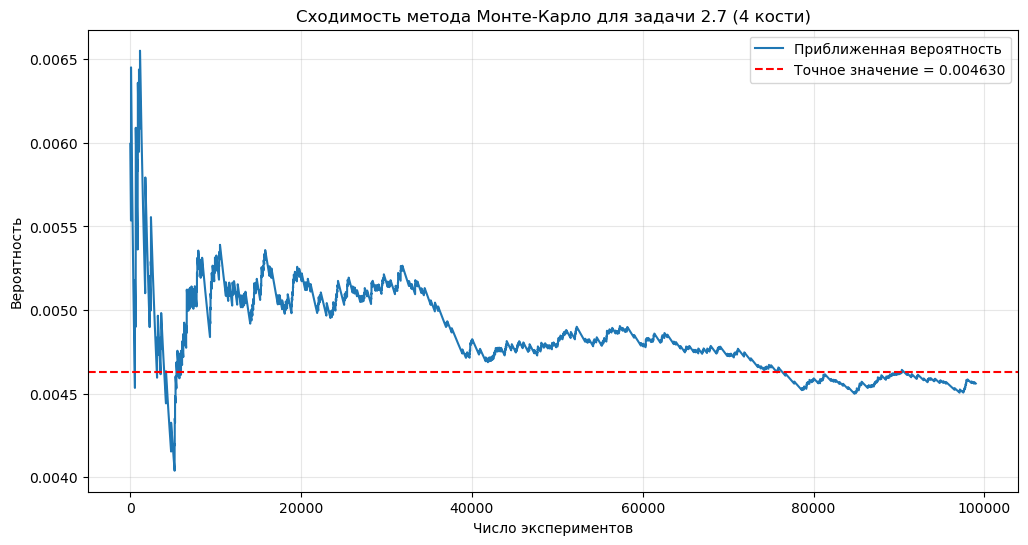

In [15]:
# Задача 2.7: Визуализация сходимости

random.seed(a=42, version=2)

n_exp = 100000
A = list(range(1, 7))
k_success = 0
prob_tmp = []

for i in range(n_exp):
    dice = random.choices(A, k=4)
    if dice[0] == dice[1] == dice[2] == dice[3]:
        k_success += 1
    prob_tmp.append(k_success / (i + 1))

plt.figure(figsize=(12, 6))
plt.plot(prob_tmp[1000:], label='Приближенная вероятность')
plt.axhline(y=prob_exact, color='r', linestyle='--', label=f'Точное значение = {prob_exact:.6f}')
plt.xlabel('Число экспериментов')
plt.ylabel('Вероятность')
plt.title('Сходимость метода Монте-Карло для задачи 2.7 (4 кости)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Задача 2.8: Пуговицы

**Условие:** В ящике 10 красных и 6 синих пуговиц. Какова вероятность того, что две наудачу вынутые пуговицы будут одноцветными?


In [16]:
# Задача 2.8: Метод Монте-Карло

# Задаем зерно датчика
random.seed(a=12345, version=2)

# Число экспериментов
n_exp = 100000

# Ящик с пуговицами: 10 красных и 6 синих
# Представим красные как 'R', синие как 'B'
buttons = ["R"] * 10 + ["B"] * 6

# Обнуляем счетчик числа благоприятных событий
k_success = 0

# n_exp испытаний
for i in range(n_exp):
    # Выбираем 2 пуговицы без возвращения
    selected = random.sample(buttons, 2)
    
    # Исход благоприятный? (обе пуговицы одного цвета)
    # Либо обе красные, либо обе синие
    if selected[0] == selected[1]:
        k_success += 1

prob_mc = k_success / n_exp
print(f'Приближенная вероятность (Монте-Карло): {np.round(prob_mc, 6)}')
print(f'После {n_exp} экспериментов')


Приближенная вероятность (Монте-Карло): 0.50098
После 100000 экспериментов


In [17]:
# Задача 2.8: Точное решение

# Всего пуговиц: 10 + 6 = 16
# Число способов выбрать 2 пуговицы из 16: C(16,2)
total_ways = scipy.special.comb(16, 2)

# Число благоприятных исходов:
# - выбрать 2 красные из 10: C(10,2)
# - выбрать 2 синие из 6: C(6,2)
favorable_ways = scipy.special.comb(10, 2) + scipy.special.comb(6, 2)

prob_exact = favorable_ways / total_ways

print(f'Точная вероятность: {prob_exact:.8f}')
print(f'Число благоприятных исходов: {favorable_ways}')
print(f'  - 2 красные: C(10,2) = {scipy.special.comb(10, 2)}')
print(f'  - 2 синие: C(6,2) = {scipy.special.comb(6, 2)}')
print(f'Общее число исходов: C(16,2) = {total_ways}')
print(f'\nФормула: [C(10,2) + C(6,2)] / C(16,2)')
print(f'= [{scipy.special.comb(10, 2)} + {scipy.special.comb(6, 2)}] / {total_ways}')
print(f'= {favorable_ways} / {total_ways}')


Точная вероятность: 0.50000000
Число благоприятных исходов: 60.0
  - 2 красные: C(10,2) = 45.0
  - 2 синие: C(6,2) = 15.0
Общее число исходов: C(16,2) = 120.0

Формула: [C(10,2) + C(6,2)] / C(16,2)
= [45.0 + 15.0] / 120.0
= 60.0 / 120.0


In [18]:
# Задача 2.8: Сравнение результатов

error = abs(prob_mc - prob_exact)
relative_error = (error / prob_exact) * 100

print(f'Приближенное значение: {prob_mc:.8f}')
print(f'Точное значение: {prob_exact:.8f}')
print(f'Абсолютная ошибка: {error:.8f}')
print(f'Относительная ошибка: {relative_error:.4f}%')


Приближенное значение: 0.50098000
Точное значение: 0.50000000
Абсолютная ошибка: 0.00098000
Относительная ошибка: 0.1960%


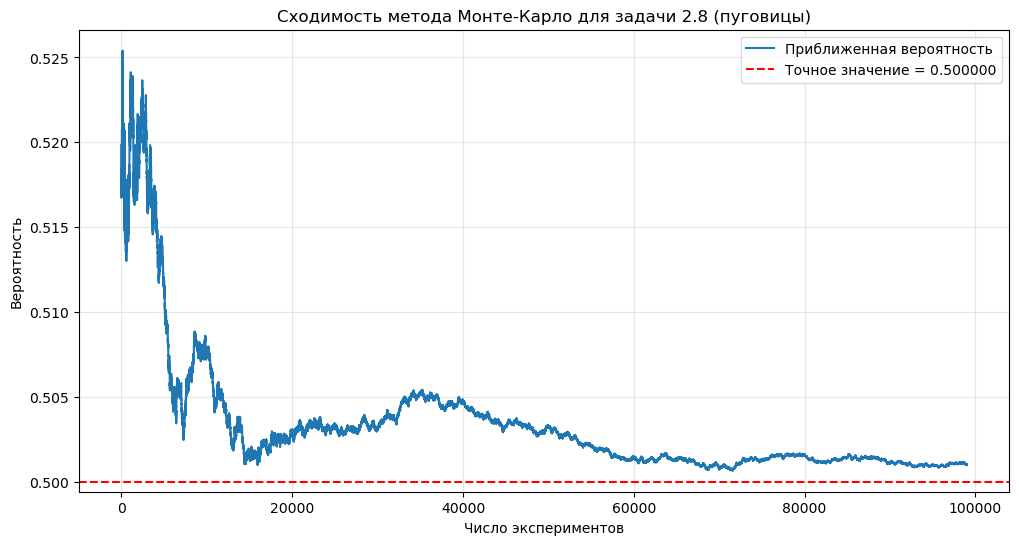

In [19]:
# Задача 2.8: Визуализация сходимости

random.seed(a=12345, version=2)

n_exp = 100000
buttons = ["R"] * 10 + ["B"] * 6
k_success = 0
prob_tmp = []

for i in range(n_exp):
    selected = random.sample(buttons, 2)
    if selected[0] == selected[1]:
        k_success += 1
    prob_tmp.append(k_success / (i + 1))

plt.figure(figsize=(12, 6))
plt.plot(prob_tmp[1000:], label='Приближенная вероятность')
plt.axhline(y=prob_exact, color='r', linestyle='--', label=f'Точное значение = {prob_exact:.6f}')
plt.xlabel('Число экспериментов')
plt.ylabel('Вероятность')
plt.title('Сходимость метода Монте-Карло для задачи 2.8 (пуговицы)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Задача 3.8: Геометрическая вероятность

**Условие:** Стержень длины l разломан в двух наудачу выбранных точках. С какой вероятностью из полученных отрезков можно составить треугольник?


In [20]:
# Задача 3.8: Метод Монте-Карло

# Задаем зерно датчика
np.random.seed(seed=54321)

# Число экспериментов
n_exp = 100000

# Длина стержня (без потери общности можно взять l = 1)
l = 1.0

# Обнуляем счетчик числа благоприятных событий
k_success = 0

# n_exp испытаний
for i in range(n_exp):
    # Выбираем две случайные точки разлома
    # Без потери общности: 0 < x < y < l
    x, y = sorted(np.random.uniform(0, l, 2))
    
    # Три отрезка после разлома
    a = x                    # первый отрезок
    b = y - x                # второй отрезок
    c = l - y                # третий отрезок
    
    # Условие треугольника: сумма любых двух сторон больше третьей
    if (a + b > c) and (a + c > b) and (b + c > a):
        k_success += 1

prob_mc = k_success / n_exp
print(f'Приближенная вероятность (Монте-Карло): {np.round(prob_mc, 6)}')
print(f'После {n_exp} экспериментов')


Приближенная вероятность (Монте-Карло): 0.24836
После 100000 экспериментов


# Задача 3.8: Точное решение

Для треугольника из трех отрезков a, b, c нужно выполнение неравенства треугольника:
 a + b > c, a + c > b, b + c > a

Если стержень длины l=1 разломан в точках x и y (0 < x < y < 1):
a = x, b = y - x, c = 1 - y

Условия:
1) a + b > c  => x + (y-x) > 1-y  => y > 1/2
2) a + c > b  => x + (1-y) > y-x  => x < 1/2
3) b + c > a  => (y-x) + (1-y) > x  => 1 > 2x  => x < 1/2

Итак, нужно: x < 1/2 и y > 1/2, при условии x < y

Вероятность = площадь благоприятной области / площадь всей области
Вся область: треугольник в координатах (x,y) где 0 < x < y < 1
Площадь всей области = 1/2

Благоприятная область: x < 1/2, y > 1/2, x < y
Это квадрат [0, 1/2] x [1/2, 1] с учетом x < y
Площадь = 1/2 * 1/2 = 1/4

In [ ]:

prob_exact = 0.25

print(f'Точная вероятность: {prob_exact:.8f}')
print(f'\nОбъяснение:')
print(f'Вероятность того, что из трех отрезков можно составить треугольник = 1/4')
print(f'Условие: первая точка разлома < 1/2, вторая точка разлома > 1/2')


Точная вероятность: 0.25000000

Объяснение:
Вероятность того, что из трех отрезков можно составить треугольник = 1/4
Условие: первая точка разлома < 1/2, вторая точка разлома > 1/2


In [22]:
# Задача 3.8: Сравнение результатов

error = abs(prob_mc - prob_exact)
relative_error = (error / prob_exact) * 100

print(f'Приближенное значение: {prob_mc:.8f}')
print(f'Точное значение: {prob_exact:.8f}')
print(f'Абсолютная ошибка: {error:.8f}')
print(f'Относительная ошибка: {relative_error:.4f}%')


Приближенное значение: 0.24836000
Точное значение: 0.25000000
Абсолютная ошибка: 0.00164000
Относительная ошибка: 0.6560%


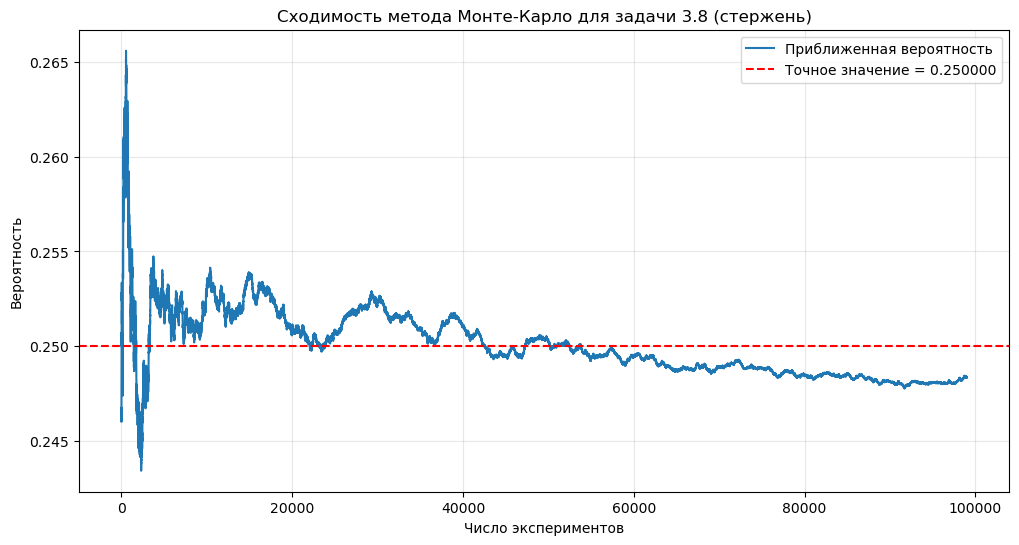

In [23]:
# Задача 3.8: Визуализация сходимости

np.random.seed(seed=54321)

n_exp = 100000
l = 1.0
k_success = 0
prob_tmp = []

for i in range(n_exp):
    x, y = sorted(np.random.uniform(0, l, 2))
    a = x
    b = y - x
    c = l - y
    if (a + b > c) and (a + c > b) and (b + c > a):
        k_success += 1
    prob_tmp.append(k_success / (i + 1))

plt.figure(figsize=(12, 6))
plt.plot(prob_tmp[1000:], label='Приближенная вероятность')
plt.axhline(y=prob_exact, color='r', linestyle='--', label=f'Точное значение = {prob_exact:.6f}')
plt.xlabel('Число экспериментов')
plt.ylabel('Вероятность')
plt.title('Сходимость метода Монте-Карло для задачи 3.8 (стержень)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Итоговое сравнение результатов

Ниже представлена сводная таблица результатов для всех трех задач.


In [24]:
# Итоговая таблица сравнения

# Пересчитываем для задачи 2.7 (кости)
random.seed(a=42, version=2)
n_exp = 100000
A = list(range(1, 7))
k_success_dice = 0
for i in range(n_exp):
    dice = random.choices(A, k=4)
    if dice[0] == dice[1] == dice[2] == dice[3]:
        k_success_dice += 1
prob_mc_dice = k_success_dice / n_exp

# Точное значение для задачи 2.7
prob_exact_dice = 6 / (6 ** 4)  # 6 благоприятных исходов из 6^4

# Пересчитываем для задачи 2.8 (пуговицы)
random.seed(a=12345, version=2)
n_exp = 100000
buttons = ["R"] * 10 + ["B"] * 6
k_success_buttons = 0
for i in range(n_exp):
    selected = random.sample(buttons, 2)
    if selected[0] == selected[1]:
        k_success_buttons += 1
prob_mc_buttons = k_success_buttons / n_exp

# Точное значение для задачи 2.8
prob_exact_buttons = (scipy.special.comb(10, 2) + scipy.special.comb(6, 2)) / scipy.special.comb(16, 2)

# Пересчитываем для задачи 3.8 (стержень)
np.random.seed(seed=54321)
n_exp = 100000
l = 1.0
k_success_rod = 0
for i in range(n_exp):
    x, y = sorted(np.random.uniform(0, l, 2))
    a = x
    b = y - x
    c = l - y
    if (a + b > c) and (a + c > b) and (b + c > a):
        k_success_rod += 1
prob_mc_rod = k_success_rod / n_exp

# Точное значение для задачи 3.8
prob_exact_rod = 0.25

# Создаем таблицу
results = pd.DataFrame({
    'Задача': ['2.7: 4 кости (одинаковые)', '2.8: Пуговицы (одноцветные)', '3.8: Стержень (треугольник)'],
    'Метод Монте-Карло': [prob_mc_dice, prob_mc_buttons, prob_mc_rod],
    'Точное значение': [prob_exact_dice, prob_exact_buttons, prob_exact_rod],
    'Абсолютная ошибка': [
        abs(prob_mc_dice - prob_exact_dice), 
        abs(prob_mc_buttons - prob_exact_buttons),
        abs(prob_mc_rod - prob_exact_rod)
    ],
    'Относительная ошибка (%)': [
        abs(prob_mc_dice - prob_exact_dice) / prob_exact_dice * 100,
        abs(prob_mc_buttons - prob_exact_buttons) / prob_exact_buttons * 100,
        abs(prob_mc_rod - prob_exact_rod) / prob_exact_rod * 100
    ]
})

results['Метод Монте-Карло'] = results['Метод Монте-Карло'].round(6)
results['Точное значение'] = results['Точное значение'].round(6)
results['Абсолютная ошибка'] = results['Абсолютная ошибка'].round(6)
results['Относительная ошибка (%)'] = results['Относительная ошибка (%)'].round(4)

print(results.to_string(index=False))


                     Задача  Метод Монте-Карло  Точное значение  Абсолютная ошибка  Относительная ошибка (%)
  2.7: 4 кости (одинаковые)            0.00456          0.00463            0.00007                     1.504
2.8: Пуговицы (одноцветные)            0.50098          0.50000            0.00098                     0.196
3.8: Стержень (треугольник)            0.24836          0.25000            0.00164                     0.656
